# Visualize and filter **DoD2k** with `cfr`

In [ ]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd

## Load the DoD2k database

In [2]:
df = pd.read_pickle('./data/dod2k_MNE_24-11-23_dup_free.pkl')
df.columns

Index(['archiveType', 'climateInterpretation_variable', 'dataSetName',
       'geo_meanElev', 'geo_meanLat', 'geo_meanLon', 'geo_siteName',
       'originalDataURL', 'originalDatabase', 'paleoData_notes',
       'paleoData_proxy', 'paleoData_sensorSpecies', 'paleoData_units',
       'paleoData_values', 'year', 'yearUnits', 'datasetId',
       'DuplicateDetails'],
      dtype='object')

## Create a `cfr.ProxyDatabase()`

In [10]:
pdb = cfr.ProxyDatabase().from_df(
    df, pid_column='datasetId',
    lat_column='geo_meanLat',
    lon_column='geo_meanLon',
    elev_column='geo_meanElev',
    time_column='year',
    value_column='paleoData_values',
    proxy_type_column='paleoData_proxy',
    archive_type_column='archiveType',
    climate_column='climateInterpretation_variable',
)

## Visualize DoD2k on a map

Note that any unkonwn proxy types (not predefined types in `cfr`)  will be colored in blue and marked with circles by default:

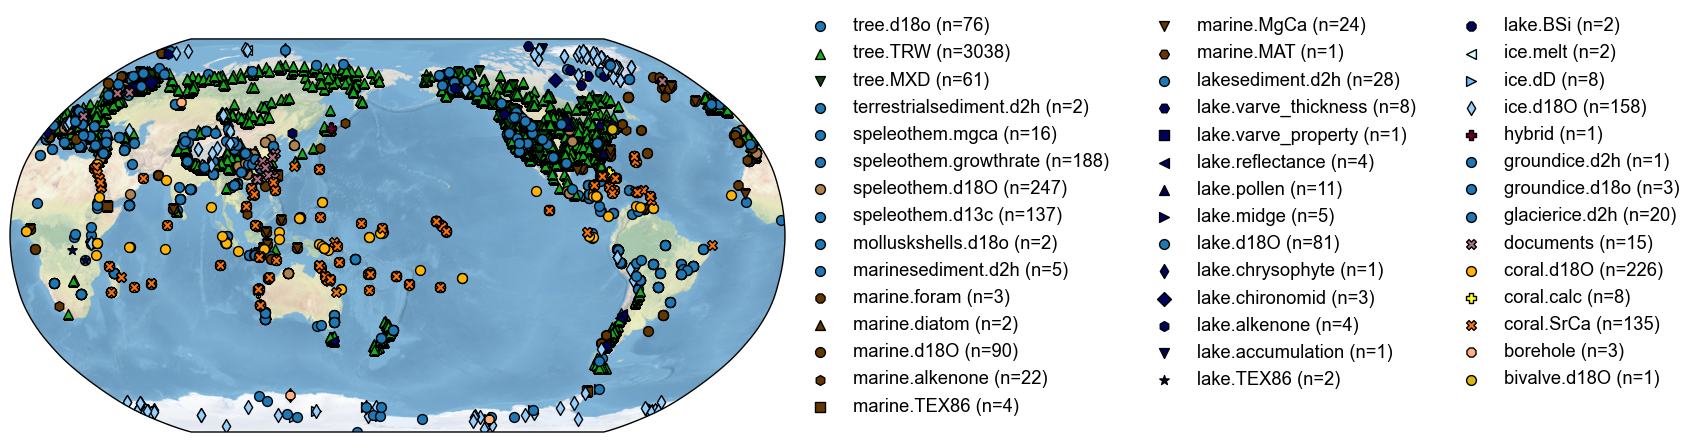

In [4]:
fig, ax = pdb.plot()

We may set color and marker styles for the unknowns via updating `cfr.visual.STYLE.colors_dict` and `cfr.visual.STYLE.markers_dict`.
For example:

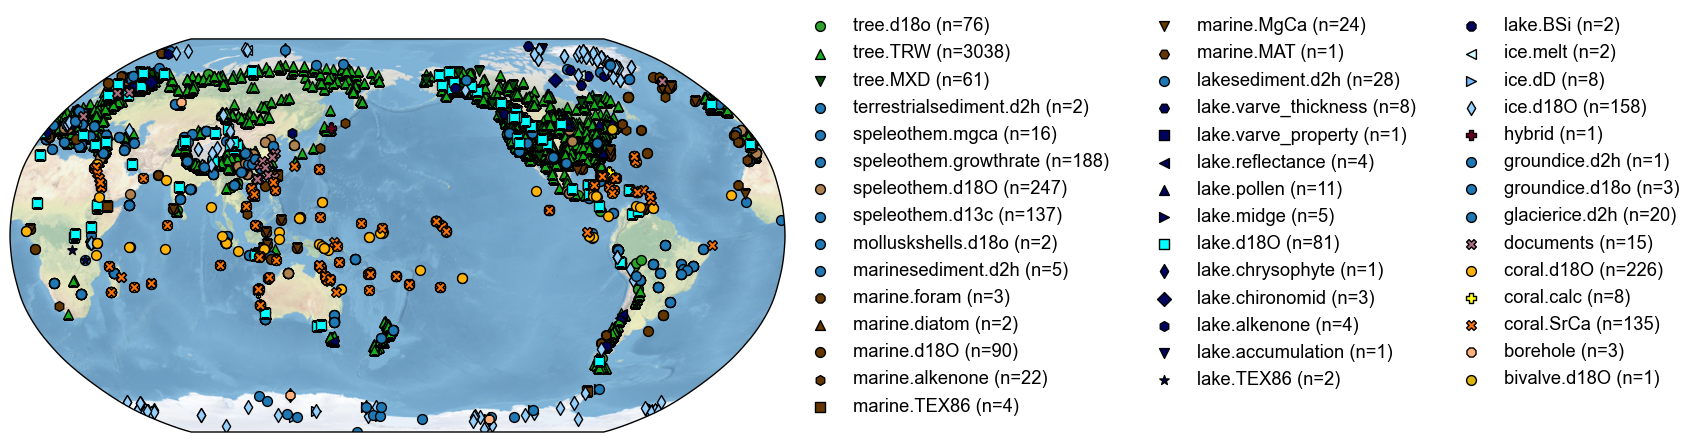

In [5]:
cfr.visual.STYLE.colors_dict.update({
    'tree.d18o': 'tab:green',
    'lake.d18O': 'cyan',
})
cfr.visual.STYLE.markers_dict.update({
    'tree.d18o': 'o',
    'lake.d18O': 's',
})
fig, ax = pdb.plot()

## Visualize DoD2k on a map with the counting of the records of each proxy type

CPU times: user 45.4 s, sys: 27 s, total: 1min 12s
Wall time: 1min 12s


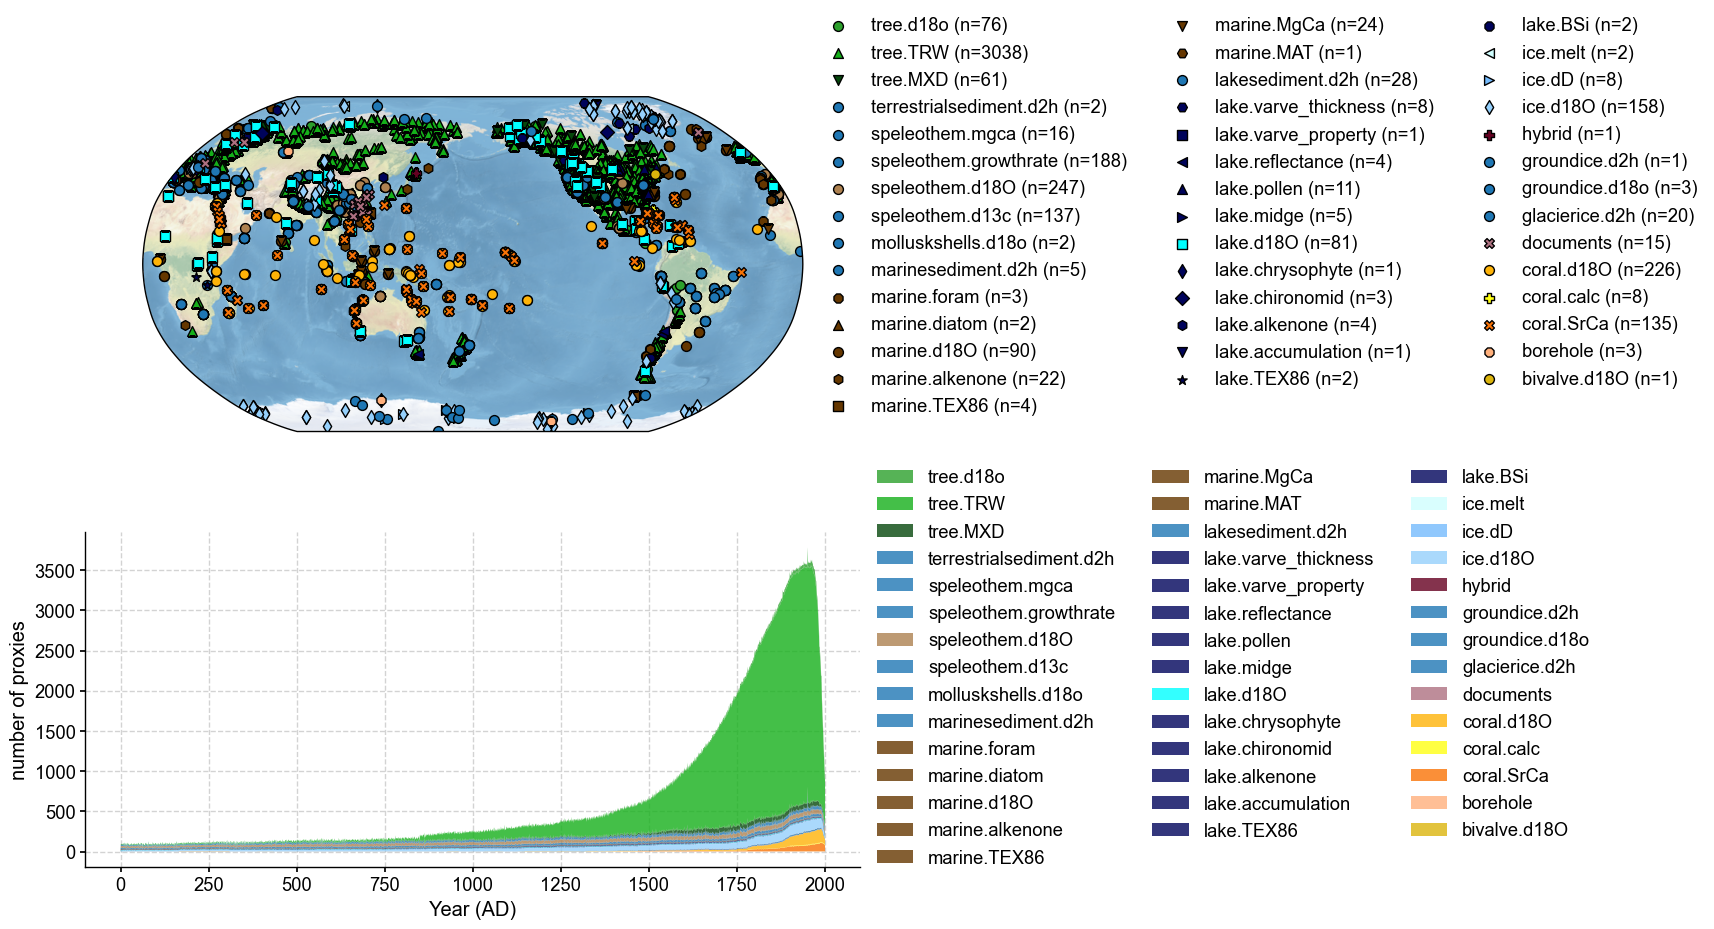

In [6]:
%%time
fig, ax = pdb.plot(plot_count=True)

## Filter the DoD2k database

We have the below climate interpretation strings:

In [8]:
set(df['climateInterpretation_variable'])

{'?18O.precipitation',
 'AMO',
 'Aridity',
 'Asian summer monsoon',
 'E/P',
 'E:P (groundwater \\fluid balance\\")"',
 'East African Monsoon strength',
 'Effective Moisture',
 'Estuary salinity',
 'Evaporation',
 'FE23_northamerica_usa_mt112: nan, FE23_northamerica_usa_mt113: nan',
 'I_E',
 'M',
 'Mean Annual Precipitation',
 'Moisture flux from the subtropical North Pacific (driven by SST anomalies in the Kuroshio Extension region)',
 'Monsoon strength',
 'NAO index',
 'NULL',
 'P',
 'P/E',
 'PDO',
 'PDSI',
 'P_E',
 'P_amount',
 'P_amount and temperature',
 'P_amount, P_E',
 'P_amount, RH',
 'P_amount, RH, T_air, P_E',
 'P_amount, T_air',
 'P_isotope',
 'Precipitation amount',
 'Precipitation amount (as a function of temperature)',
 'Precipitation source',
 'Precipitation_amount, SAM',
 'Precipitation_amount, Temperature_air',
 'Precipitation_amount, humidity',
 'S',
 'Solar insolation',
 'Source and intensity',
 'Storm track, Pacific SST',
 'T',
 'TM',
 'T_air',
 'T_air, P_amount',
 

Now let's add tags for hydroclimate records.
Below is a nonexhaustive example:

In [11]:
for pid, pobj in pdb.records.items():
    # as an example below
    conds = [
        'moisture' in pobj.climate.lower(),
        'precip' in pobj.climate.lower(),
        'water' in pobj.climate.lower(),
        'lake' in pobj.climate.lower(),
        pobj.climate in ['~T~M', 'PDSI', 'P_E', 'P'],
    ]
    if any(conds):
        pdb[pid].tags.add('hydro')

With the tag information, we can filter the database and visualize only the hydroclimate records in the database:

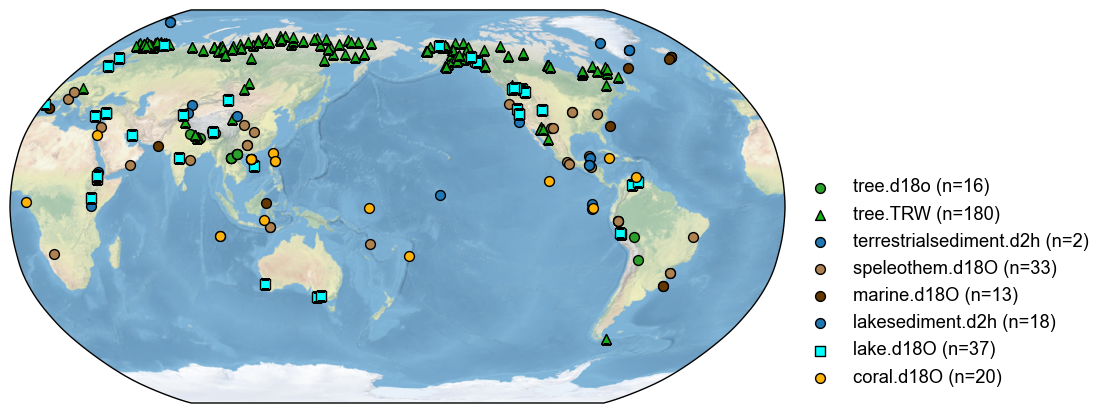

In [ ]:
fig, ax = pdb.filter(by='tag', keys=['hydro']).plot()